In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm
import glob as glob

In [2]:
os.chdir('../DATA')

In [3]:
DATA_PATH = os.getcwd()
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'valid')
TRAIN_LABEL_CHILD_PATH = os.path.join(DATA_PATH, 'ECG_child_age_train.csv')
TEST_LABEL__ADULT_PATH = os.path.join(DATA_PATH, 'ECG_adult_age_train.csv')


In [4]:
DATA_PATH

'/media/do/One Touch/GitHub/ECG_AI/DATA'

In [5]:
train_df = pd.read_csv(TRAIN_LABEL_CHILD_PATH)
print(train_df.shape)
print(train_df.head())


(8781, 3)
      FILENAME  GENDER       AGE
0  ecg_child_0    MALE  1.500000
1  ecg_child_1    MALE  4.833333
2  ecg_child_2  FEMALE  5.583333
3  ecg_child_3  FEMALE  5.083333
4  ecg_child_4    MALE  0.166667


In [6]:
# numpy file check
train_file_list = train_df['FILENAME'].values
train_file_list = [file+'.npy' for file in train_file_list]
train_file_list = [file for file in train_file_list if file.endswith('.npy')]
print(len(train_file_list))
print(train_file_list[:5])

8781
['ecg_child_0.npy', 'ecg_child_1.npy', 'ecg_child_2.npy', 'ecg_child_3.npy', 'ecg_child_4.npy']


In [7]:
os.chdir('train')

In [8]:
print(np.load(train_file_list[0]))
print(np.load(train_file_list[0]).shape)

[76.  76.  76.  ... 19.5 19.5 19. ]
(60000,)


In [9]:
train_data = np.load('train_data.npy')
train_data.shape

(8781, 60000)

In [10]:
# # numpy file load
# train_data = []
# for file in tqdm(train_file_list):
#     data = np.load(file)
#     train_data.append(data)
# train_data = np.array(train_data)
# print(train_data.shape)

# train_df.to_csv('train_label.csv', index=False)
# np.save('train_data.npy', train_data)

In [11]:
train_file_list

['ecg_child_0.npy',
 'ecg_child_1.npy',
 'ecg_child_2.npy',
 'ecg_child_3.npy',
 'ecg_child_4.npy',
 'ecg_child_5.npy',
 'ecg_child_6.npy',
 'ecg_child_7.npy',
 'ecg_child_8.npy',
 'ecg_child_9.npy',
 'ecg_child_10.npy',
 'ecg_child_11.npy',
 'ecg_child_12.npy',
 'ecg_child_13.npy',
 'ecg_child_14.npy',
 'ecg_child_15.npy',
 'ecg_child_16.npy',
 'ecg_child_17.npy',
 'ecg_child_18.npy',
 'ecg_child_19.npy',
 'ecg_child_20.npy',
 'ecg_child_21.npy',
 'ecg_child_22.npy',
 'ecg_child_23.npy',
 'ecg_child_24.npy',
 'ecg_child_25.npy',
 'ecg_child_26.npy',
 'ecg_child_27.npy',
 'ecg_child_28.npy',
 'ecg_child_29.npy',
 'ecg_child_30.npy',
 'ecg_child_31.npy',
 'ecg_child_32.npy',
 'ecg_child_33.npy',
 'ecg_child_34.npy',
 'ecg_child_35.npy',
 'ecg_child_36.npy',
 'ecg_child_37.npy',
 'ecg_child_38.npy',
 'ecg_child_39.npy',
 'ecg_child_40.npy',
 'ecg_child_41.npy',
 'ecg_child_42.npy',
 'ecg_child_43.npy',
 'ecg_child_44.npy',
 'ecg_child_45.npy',
 'ecg_child_46.npy',
 'ecg_child_47.npy',
 '

In [12]:
train_df['A_C'] = 'child'
train_df.head()

,FILENAME,GENDER,AGE,A_C
0,ecg_child_0,MALE,1.500000,child
1,ecg_child_1,MALE,4.833333,child
2,ecg_child_2,FEMALE,5.583333,child
3,ecg_child_3,FEMALE,5.083333,child
4,ecg_child_4,MALE,0.166667,child


In [13]:
print(f'Minimum value: {np.min(train_data[0:100])}')
print(f"Maximum value: {np.max(train_data[0:100])}")
print(f"Mean value: {np.mean(train_data[0:100])}")
print(f"Standard Deviation: {np.std(train_data[0:100])}")


Minimum value: -8393.0
Maximum value: 1838.0
Mean value: -1.1806735
Standard Deviation: 64.65982086855067


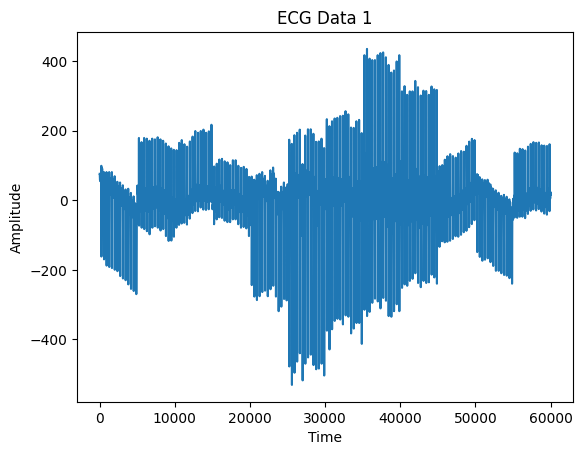

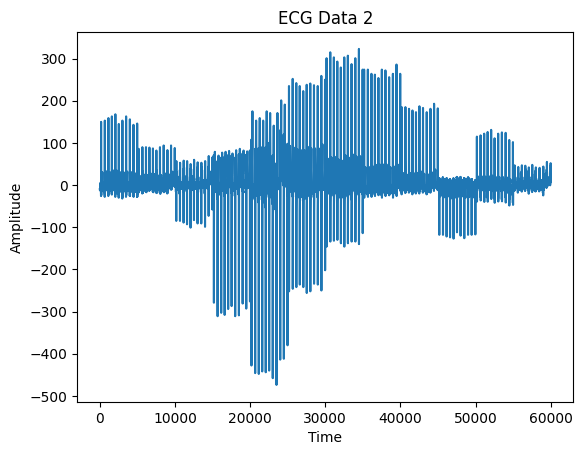

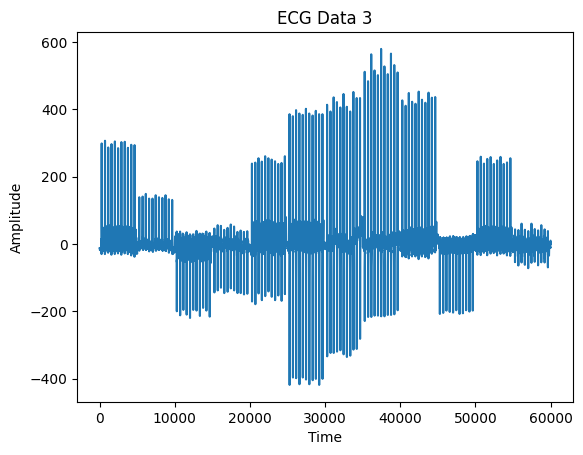

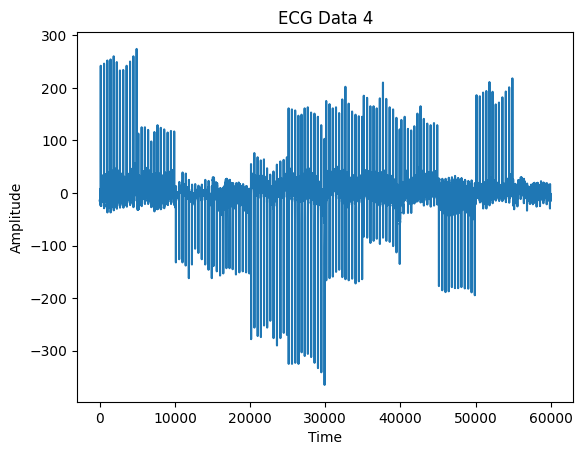

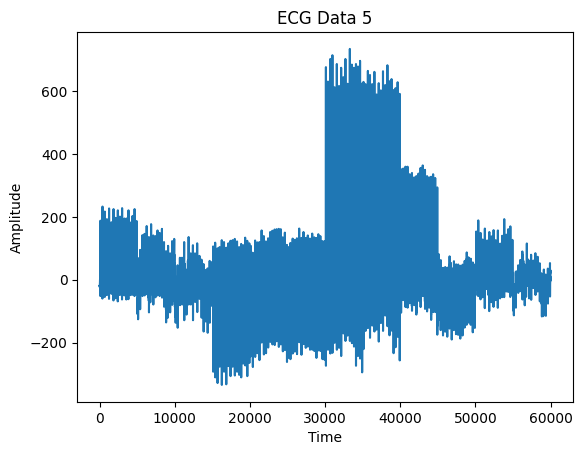

In [17]:
for i in range(5): 
    plt.plot(train_data[i])
    plt.title(f'ECG Data {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

In [19]:
Q1 = np.percentile(train_data, 25)
Q3 = np.percentile(train_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train_data[(train_data < lower_bound) | (train_data > upper_bound)]
print("Number of Outliers:", len(outliers))


Number of Outliers: 61811413


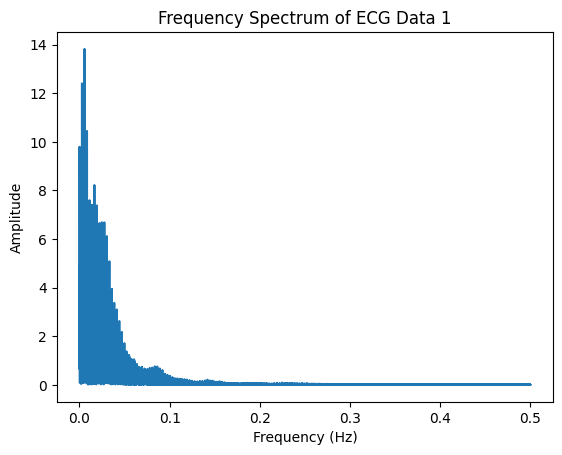

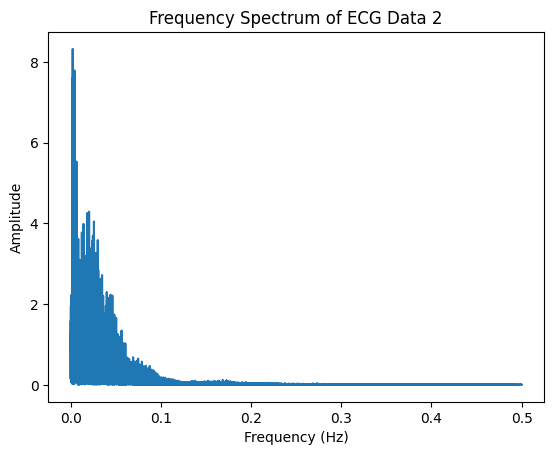

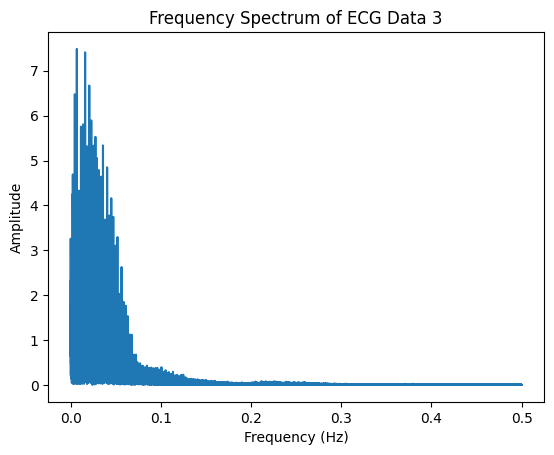

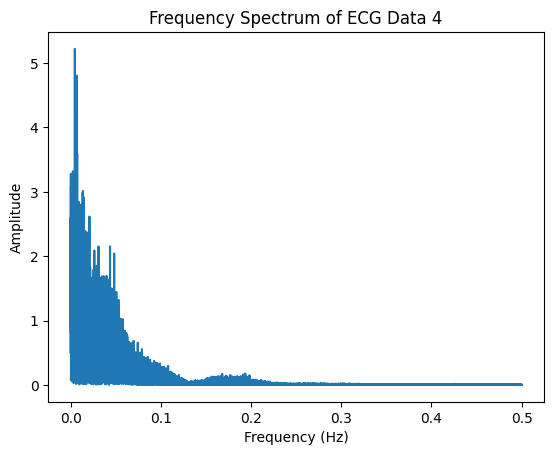

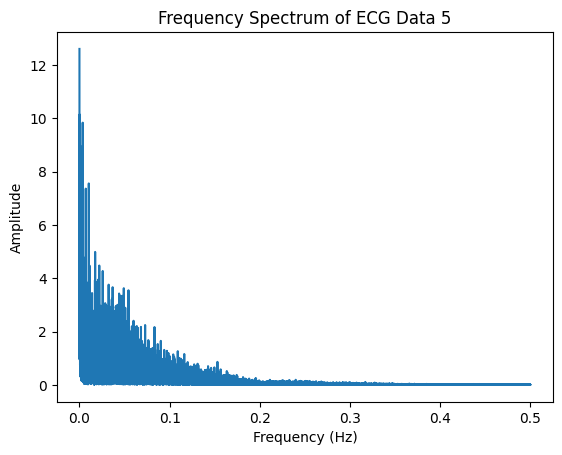

In [20]:
from numpy.fft import fft, fftfreq

N = len(train_data[0])
T = 1.0 

for i in range(5): 
    yf = fft(train_data[i])
    xf = fftfreq(N, T)[:N//2]
    
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.title(f'Frequency Spectrum of ECG Data {i+1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()
